In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Rectangle
import seaborn

In [2]:
df_lip=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqLIP"])
df_PS=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqPS"])
df_PC=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","contactfreqPC"])

In [3]:
df_lip.head()

res  contactfreqLIP
0  1885            0.02
1  1886            0.55
2  1887            0.80
3  1888            1.71
4  1889            0.08

In [4]:
result = df_lip.merge(df_PS,how='outer').merge(df_PC,how='outer').fillna(0)

In [5]:
print(result)

      res  contactfreqLIP  contactfreqPS  contactfreqPC
0    1885            0.02           0.00           0.02
1    1886            0.55           0.02           0.53
2    1887            0.80           0.00           0.80
3    1888            1.71           1.33           0.39
4    1889            0.08           0.00           0.08
..    ...             ...            ...            ...
155  2181           60.76          11.10          56.24
156  2182           95.55          11.61          93.76
157  2183           64.14           6.20          59.67
158  2184            0.04           0.04           0.00
159  2187           51.33          51.24           3.73

[160 rows x 4 columns]


In [6]:
#hist=result.hist()

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.bar(result.res,result.contactfreqLIP,color='black')
ax2.bar(result.res,result.contactfreqPC,color='blue')
ax3.bar(result.res,result.contactfreqPS,color='red')
ax3.set_xlabel('resid')
ax2.set_ylabel('contact freq')

Text(0, 0.5, 'contact freq')

In [8]:
#fig.savefig("contactfreqfig.pdf")

In [9]:
df_LIP_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_LIP_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.2/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_LIP_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.3/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
df_LIP_repl4=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf4"])
df_LIP_repl5=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf5"])
df_LIP_repl6=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/prot-lip_cutoff5.data.dat', sep=',', header=None, names=["res","cf6"])
result_LIP = df_LIP_repl1.merge(df_LIP_repl2,how='outer').merge(df_LIP_repl3,how='outer').merge(df_LIP_repl4,how='outer').merge(df_LIP_repl5,how='outer').merge(df_LIP_repl6,how='outer').fillna(0)

df_PC_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_PC_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.2/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_PC_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.3/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
df_PC_repl4=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf4"])
df_PC_repl5=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf5"])
df_PC_repl6=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/prot-PC_cutoff5.data.dat', sep=',', header=None, names=["res","cf6"])
result_PC = df_PC_repl1.merge(df_PC_repl2,how='outer').merge(df_PC_repl3,how='outer').merge(df_PC_repl4,how='outer').merge(df_PC_repl5,how='outer').merge(df_PC_repl6,how='outer').fillna(0)

df_PS_repl1=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf1"])
df_PS_repl2=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.2/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf2"])
df_PS_repl3=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7_120apl/openmm_dcle_tightrest.3/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf3"])
df_PS_repl4=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf4"])
df_PS_repl5=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.2/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf5"])
df_PS_repl6=pd.read_csv('/Users/jespermadsen/Projects/FV-HMMM/output_from_RRA/production_chlen7/openmm_dcle_tightrest.3/prot-PS_cutoff5.data.dat', sep=',', header=None, names=["res","cf6"])
result_PS = df_PS_repl1.merge(df_PS_repl2,how='outer').merge(df_PS_repl3,how='outer').merge(df_PS_repl4,how='outer').merge(df_PS_repl5,how='outer').merge(df_PS_repl6,how='outer').fillna(0)

In [10]:
new_df_LIP = pd.DataFrame(data=[result_LIP.cf1,result_LIP.cf2,result_LIP.cf3,result_LIP.cf4,result_LIP.cf5,result_LIP.cf6])
new_df_PC = pd.DataFrame(data=[result_PC.cf1,result_PC.cf2,result_PC.cf3,result_PC.cf4,result_PC.cf5,result_PC.cf6])
new_df_PS = pd.DataFrame(data=[result_PS.cf1,result_PS.cf2,result_PS.cf3,result_PS.cf4,result_PS.cf5,result_PS.cf6])

In [11]:
new_df_LIP

0     1     2     3     4     5     6      7      8     9    ...   475  \
cf1  0.02  0.55  0.80  1.71  0.08  1.10  2.00  13.49   4.18  0.53  ...  0.00   
cf2  0.00  0.98  1.02  0.86  0.04  0.14  3.43  18.53  14.80  2.96  ...  0.00   
cf3  0.00  6.63  0.55  0.06  0.00  0.00  0.04   2.08   0.20  0.02  ...  0.00   
cf4  0.02  0.82  1.10  0.59  0.10  0.04  0.04   4.84   0.10  0.00  ...  0.00   
cf5  0.00  1.61  0.96  0.39  0.12  0.06  0.24  16.90   0.71  0.04  ...  0.57   
cf6  0.00  5.29  0.31  0.00  0.00  0.00  0.02  65.59   0.80  0.00  ...  0.00   

      476   477   478   479   480   481   482   483   484  
cf1  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
cf2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
cf3  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
cf4  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
cf5  0.02  0.02  0.12  0.02  0.02  0.00  0.00  0.00  0.00  
cf6  0.00  0.00  0.00  0.00  0.00  0.02  0.08  0.04  0.22  

[6 rows x 485 columns]

In [12]:
new_df_LIP.mean()

0      0.006667
1      2.646667
2      0.790000
3      0.601667
4      0.056667
         ...   
480    0.003333
481    0.003333
482    0.013333
483    0.006667
484    0.036667
Length: 485, dtype: float64

In [13]:
print('ok')

ok


Text(2150, 120, 'C2')

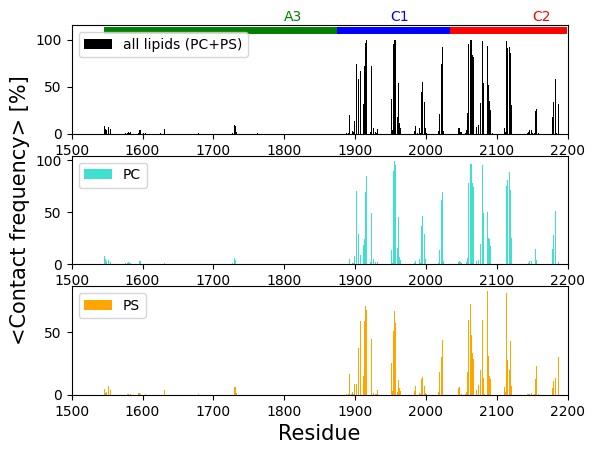

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
#fig.clf()
ax1.bar(result_LIP.res,new_df_LIP.mean(),color='black',label='all lipids (PC+PS)')
ax2.bar(result_PC.res,new_df_PC.mean(),color='turquoise',label='PC')
ax3.bar(result_PS.res,new_df_PS.mean(),color='orange',label='PS')
ax3.set_xlabel('Residue',size=15)
ax2.set_ylabel('<Contact frequency> [%]',size=15)
ax1.set_xlim([1500,2200])
ax2.set_xlim([1500,2200])
ax3.set_xlim([1500,2200])
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
ax3.legend(loc="upper left")

#domain spec
ax1.plot([1550,1876],[110,110], 'g-', lw=5)
ax1.plot([1879,2033],[110,110], 'b-', lw=5)
ax1.plot([2038,2193],[110,110], 'r-', lw=5)
ax1.text(1800,120,'A3',c='green')
ax1.text(1950,120,'C1',c='blue')
ax1.text(2150,120,'C2',c='red')

In [15]:
fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq/contactfreq_avg_allmemb.pdf")

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
#fig.clf()
ax1.bar(result_LIP.res,new_df_LIP.mean(),color='black',label='all lipids')
ax2.bar(result_PC.res,new_df_PC.mean(),color='turquoise',label='PC')
ax3.bar(result_PS.res,new_df_PS.mean(),color='orange',label='PS')
ax3.set_xlabel('Residue',size=15)
ax2.set_ylabel('<Contact frequency> [%]',size=15)
ax1.set_xlim([1874,2200])
ax2.set_xlim([1874,2200])
ax3.set_xlim([1874,2200])
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")

#domain spec
#ax1.plot([1550,1876],[110,110], 'g-', lw=5)
ax1.plot([1879,2033],[110,110], 'b-', lw=5)
ax1.plot([2038,2193],[110,110], 'r-', lw=5)
#ax1.text(1800,120,'A3',c='green')
ax1.text(1950,120,'C1',c='blue')
ax1.text(2150,120,'C2',c='red')

Text(2150, 120, 'C2')

In [17]:
fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq/contactfreq_avg_allmemb_C1C2only.pdf")

In [18]:
new_df_LIP.mean()

0      0.006667
1      2.646667
2      0.790000
3      0.601667
4      0.056667
         ...   
480    0.003333
481    0.003333
482    0.013333
483    0.006667
484    0.036667
Length: 485, dtype: float64

In [19]:
result_LIP.res

0      1885
1      1886
2      1887
3      1888
4      1889
       ... 
480    2041
481    2053
482    2054
483    2132
484    2134
Name: res, Length: 485, dtype: int64

In [20]:
t1=new_df_PC.mean()[result_PC.res.between(1879,2033)]
t2=new_df_PC.mean()[result_PC.res.between(2038,2193)]
total=pd.DataFrame({'C1' : t1, 'C2' : t2})

In [21]:
total

C1        C2
0    0.006667       NaN
1    0.421667       NaN
2    0.548333       NaN
3    0.290000       NaN
4    0.053333       NaN
..        ...       ...
343       NaN  0.016667
344       NaN  0.003333
345       NaN  0.013333
346       NaN  0.006667
347       NaN  0.036667

[209 rows x 2 columns]

In [22]:
cc_LIP=pd.concat([result_LIP,new_df_LIP.mean()],axis=1)
cc_PC=pd.concat([result_PC,new_df_PC.mean()],axis=1)
cc_PS=pd.concat([result_PS,new_df_PS.mean()],axis=1)

In [23]:
cc_LIP=cc_LIP.rename(columns = {0:'meanLIP'})
cc_PC=cc_PC.rename(columns = {0:'meanPC'})
cc_PS=cc_PS.rename(columns = {0:'meanPS'})

In [24]:
cc_LIP=cc_LIP.drop(['cf1','cf2','cf3','cf4','cf5','cf6'],axis=1)
cc_PC=cc_PC.drop(['cf1','cf2','cf3','cf4','cf5','cf6'],axis=1)
cc_PS=cc_PS.drop(['cf1','cf2','cf3','cf4','cf5','cf6'],axis=1)

In [25]:
comb=cc_LIP.merge(cc_PC,how='outer').merge(cc_PS,how='outer').fillna(0)

In [26]:
comb.head()

res   meanLIP    meanPC    meanPS
0  1885  0.006667  0.006667  0.000000
1  1886  2.646667  0.421667  2.226667
2  1887  0.790000  0.548333  0.243333
3  1888  0.601667  0.290000  0.316667
4  1889  0.056667  0.053333  0.003333

In [27]:
#comb[comb.res.between(1886,1888)]['metric']=2
#df['Discount_rating'] = np.where(df['Discount'] > 2000, 'Good', 'Bad')
#t1=new_df_PC.mean()[result_PC.res.between(1879,2033)]
#t2=new_df_PC.mean()[result_PC.res.between(2038,2193)]
c1df=comb[np.where((comb['res']<2034) & (comb['res']>1878),True,False)]
c2df=comb[np.where((comb['res']<2194) & (comb['res']>2037),True,False)]

In [28]:
c2df['metric']='C2'
c1df['metric']='C1'

/var/folders/c8/mg5_rl016nl7jxykwhd6sn3c0000gn/T/ipykernel_1440/2569626948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2df['metric']='C2'
/var/folders/c8/mg5_rl016nl7jxykwhd6sn3c0000gn/T/ipykernel_1440/2569626948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1df['metric']='C1'


In [29]:
x1=pd.DataFrame( {'val' : c2df['meanPS'], 'lipid' : 'PS', 'dom' : 'C2'} )
x2=pd.DataFrame( {'val' : c2df['meanPC'], 'lipid' : 'PC', 'dom' : 'C2'} )
x3=pd.DataFrame( {'val' : c1df['meanPS'], 'lipid' : 'PS', 'dom' : 'C1'} )
x4=pd.DataFrame( {'val' : c1df['meanPC'], 'lipid' : 'PC', 'dom' : 'C1'} )

In [30]:
x2

val lipid dom
77   0.840000    PC  C2
78   1.935000    PC  C2
79   2.786667    PC  C2
80   1.526667    PC  C2
81   1.588333    PC  C2
..        ...   ...  ..
480  0.003333    PC  C2
481  0.003333    PC  C2
482  0.013333    PC  C2
483  0.006667    PC  C2
484  0.036667    PC  C2

[105 rows x 3 columns]

In [81]:
print(np.range(0,10,5))

AttributeError: module 'numpy' has no attribute 'range'

In [95]:
seaborn.set_style('whitegrid')
fig, ax = plt.subplots()
seaborn.violinplot(x='dom',y='val',hue='lipid',data=pd.concat([x4,x3,x2,x1]),inner='stick',scale='count',saturation=1, split=True,palette={"PC": "turquoise", "PS": "orange"},cut=0)
#ax.set_yscale('log')
#ax.set_ylim(10, 200)
ax.set_xlabel('Domain',size=15)
ax.set_ylabel('<Contact frequency> [%]',size=15)
ax.set_ylim([0,100])
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

x_positions = [-0.5,-0.4,-0.3,-0.2,-0.1, 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5]  # Replace with the desired x positions for the vertical grid lines
ax.set_xticks(x_positions)
ax.grid(True, axis='both',which='both', linestyle='--')

#seaborn.despine()
#seaborn.stripplot(x='dom',y='val',hue='lipid',data=pd.concat([x1,x2,x3,x4]),jitter=True,zorder=1)
#seaborn.swarmplot(x='dom',y='val',hue='lipid',data=pd.concat([x1,x2,x3,x4]),color="white")

In [96]:
fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq/contactfreq_avg_allmemb_violin.pdf")

In [33]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC)
ax.set_xlabel('<PS Contact frequency> [%]')
ax.set_ylabel('<PC Contact frequency> [%]')

for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)

ax.set_ylim([0,100])
ax.set_xlim([0,100])


(0.0, 100.0)

In [34]:
comb

res   meanLIP    meanPC    meanPS
0    1885  0.006667  0.006667  0.000000
1    1886  2.646667  0.421667  2.226667
2    1887  0.790000  0.548333  0.243333
3    1888  0.601667  0.290000  0.316667
4    1889  0.056667  0.053333  0.003333
..    ...       ...       ...       ...
480  2041  0.003333  0.003333  0.000000
481  2053  0.003333  0.003333  0.000000
482  2054  0.013333  0.013333  0.000000
483  2132  0.006667  0.006667  0.000000
484  2134  0.036667  0.036667  0.000000

[485 rows x 4 columns]

In [35]:
col=np.multiply( np.sin(math.pi/4 - np.arctan(comb.meanPC/comb.meanPS)), np.sqrt(comb.meanPC*comb.meanPC+comb.meanPS*comb.meanPS))

In [36]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col,cmap='coolwarm_r')
ax.set_xlabel('<PS Contact frequency> [%]',size=15)
ax.set_ylabel('<PC Contact frequency> [%]',size=15)
ax.plot([0,50,50,0,0,100],[0,0,50,50,0,100],alpha=0.5,linestyle='--')
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    
ax.set_ylim([0,100])
ax.set_xlim([0,100])
ax.add_patch(Rectangle((0,0),50,50,fc="CornflowerBlue", zorder=10,alpha=0.1))
fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_allmemb.pdf')

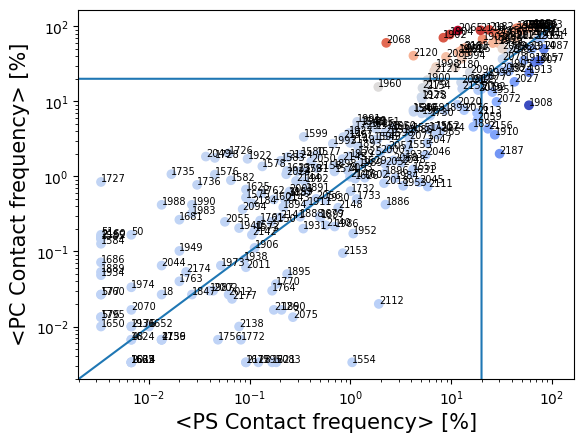

In [37]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col,cmap='coolwarm_r')
ax.set_xlabel('<PS Contact frequency> [%]',size=15)
ax.set_ylabel('<PC Contact frequency> [%]',size=15)
ax.plot([0,20,20,0,0,100],[0,0,20,20,0,100])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    
#ax.set_ylim([0,100])
#ax.set_xlim([0,100])
ax.set_yscale('log')
ax.set_xscale('log')
fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_allmemb_loglog.pdf')

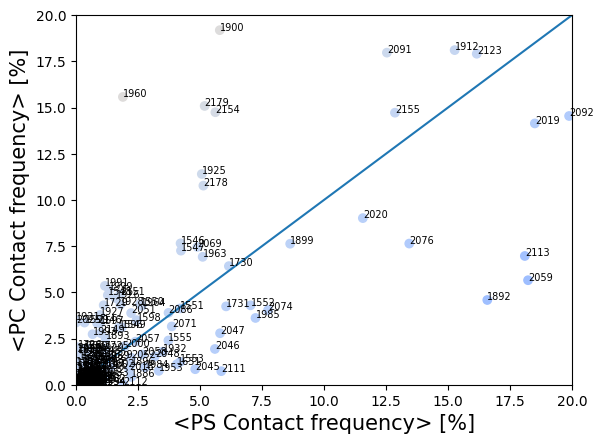

In [38]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col,cmap='coolwarm_r')
ax.set_xlabel('<PS Contact frequency> [%]',size=15)
ax.set_ylabel('<PC Contact frequency> [%]',size=15)
ax.set_ylim([0,20])
ax.set_xlim([0,20])
ax.plot([0,20],[0,20])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    

fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_0_20_allmemb.pdf')

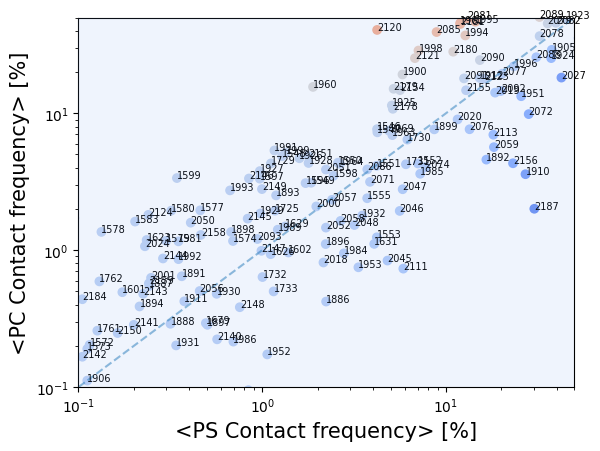

In [39]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col,cmap='coolwarm_r')
ax.set_xlabel('<PS Contact frequency> [%]',size=15)
ax.set_ylabel('<PC Contact frequency> [%]',size=15)
ax.set_ylim([0.10,50])
ax.set_xlim([0.10,50])
ax.plot([0,50],[0,50],alpha=0.5,linestyle='--')
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.add_patch(Rectangle((0,0),50,50,fc="CornflowerBlue", zorder=10,alpha=0.1))
fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_0_20_allmemb_loglog.pdf')

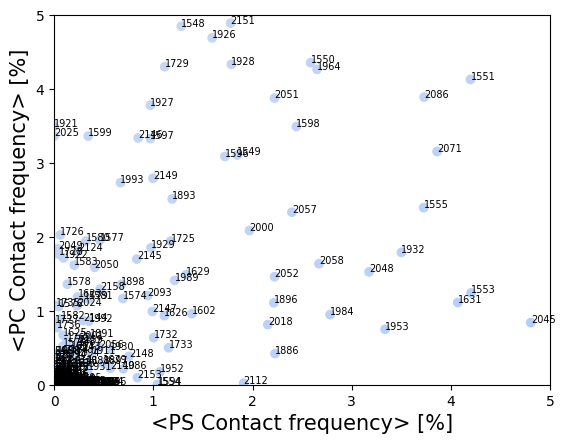

In [40]:
fig, ax = plt.subplots()

ax.scatter(comb.meanPS,comb.meanPC,c=col,cmap='coolwarm_r')
ax.set_xlabel('<PS Contact frequency> [%]',size=15)
ax.set_ylabel('<PC Contact frequency> [%]',size=15)
ax.set_ylim([0,5])
ax.set_xlim([0,5])
for i, txt in enumerate(comb.res):
    ax.annotate(txt, (comb.meanPS[i], comb.meanPC[i]),size=7)
    

fig.savefig('/Users/jespermadsen/Projects/FV-HMMM/figures/fva_contactfreq_scatter/contactscatter_0_5_allmemb.pdf')

In [41]:
col

0     -0.004714
1      1.276328
2     -0.215668
3      0.018856
4     -0.035355
         ...   
480   -0.002357
481   -0.002357
482   -0.009428
483   -0.004714
484   -0.025927
Length: 485, dtype: float64

In [42]:
comb.res[0]

1885

In [43]:
col[0]

-0.004714045207910317

In [44]:
for k in range(len(comb.res)):
    print(comb.res[k],col[k])

1885 -0.004714045207910317
1886 1.276327740041718
1887 -0.21566756826189704
1888 0.018856180831641273
1889 -0.03535533905932738
1890 0.13435028842544405
1891 -0.19798989873223327
1892 8.48410286293659
1893 -0.9357379737701979
1894 -0.12256517540566828
1896 0.7825315045131127
1897 0.15438498055906286
1898 -0.48201112250883
1899 0.7118208263944582
1900 -9.468159800087873
1901 -33.25051787399541
1902 -43.94315091683799
1903 -30.112142276829132
1904 -48.10918836932874
1905 6.08818938601618
1906 0.0
1907 24.069914831590076
1908 35.53565128852995
1910 16.60522424486409
1911 -0.03299831645537223
1912 -2.0081832585697943
1913 24.821805042251757
1914 9.545941546018401
1915 1.1726187454676902
1916 -11.710866807751193
1917 -21.19670427736873
1918 12.28598032311627
1922 -1.145512985522207
1923 -3.080628543369398
1924 8.545385450639426
1925 -4.475985924910844
1926 -2.1908525103763195
1927 -1.986970055134199
1928 -1.8007652694217406
1929 -0.619896944840207
1930 0.06010407640085655
1932 1.20915259582

In [45]:
len(result_LIP.res)==len(new_df_LIP.mean())

True

In [46]:
for k in range(len(result_LIP.res)):
    print(result_LIP.res[k],new_df_LIP.mean()[k])

1885 0.006666666666666667
1886 2.6466666666666665
1887 0.7899999999999999
1888 0.6016666666666667
1889 0.056666666666666664
1890 0.22333333333333338
1891 0.9616666666666666
1892 20.238333333333333
1893 3.4650000000000003
1894 0.5916666666666667
1896 3.1183333333333336
1897 0.7549999999999999
1898 1.9966666666666668
1899 13.218333333333332
1900 21.724999999999998
1901 79.28333333333332
1902 74.0
1903 97.62166666666667
1904 81.18
1905 57.77333333333333
1906 0.22333333333333336
1907 83.365
1908 67.19166666666668
1910 29.345
1911 0.7983333333333332
1912 31.584999999999997
1913 71.54166666666667
1914 85.67666666666666
1915 96.89833333333333
1916 99.21666666666665
1917 99.28666666666668
1918 75.16333333333334
1922 1.781666666666667
1923 72.52833333333334
1924 51.78
1925 15.14
1926 6.055
1927 4.488333333333334
1928 5.465
1929 2.248333333333333
1930 0.9249999999999999
1932 4.954999999999999
1938 0.16666666666666666
1940 0.27666666666666667
1951 36.49666666666667
1952 1.2383333333333333
1953 4.